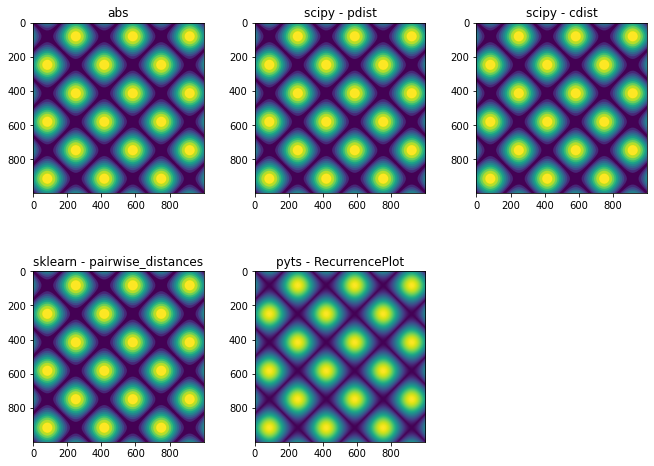

In [64]:
import numpy as np
from scipy.spatial import distance
from scipy.spatial.distance import squareform
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances
from pyts.image import RecurrencePlot

# Reference from 
# https://stackoverflow.com/questions/33650371/recurrence-plot-in-python
# https://stackoverflow.com/questions/52908588/vectorization-and-optimization-of-matrix-subtraction
# https://pyts.readthedocs.io/en/stable/generated/pyts.image.RecurrencePlot.html

def recurrence_plot_abs(s, eps=None, steps=None):
    if eps==None: eps=0.1
    if steps==None: steps=10
    d = np.abs(s[:,None]-s)
    d = np.floor(d / eps)
    d[d > steps] = steps
    return d

def recurrence_plot_pdist(s, eps=None, steps=None):
    if eps==None: eps=0.1
    if steps==None: steps=10
    d = distance.pdist(s)
    d = np.floor(d / eps)
    d[d > steps] = steps
    Z = squareform(d)
    return Z

def recurrence_plot_cdist(s, eps=None, steps=None):
    if eps==None: eps=0.1
    if steps==None: steps=10
    d = distance.cdist(s,s,metric='euclidean')
    d = np.floor(d / eps)
    d[d > steps] = steps
    return d

def recurrence_plot_sk(s, eps=None, steps=None):
    if eps==None: eps=0.1
    if steps==None: steps=10
    d = pairwise_distances(s)
    d = np.floor(d / eps)
    d[d > steps] = steps
    return d

threshold = 0.205
sine_wave = np.sin(np.linspace(0, 6 * np.pi, 1000))
plt.rcParams["font.size"] = 10
fig = plt.figure(figsize=(11,11))

ax1 = fig.add_subplot(2, 3, 1)
ax1.set_title("abs")
ax1.imshow(recurrence_plot_abs(sine_wave[:,None], threshold))

ax2 = fig.add_subplot(2, 3, 2)
ax2.set_title("scipy - pdist")
ax2.imshow(recurrence_plot_pdist(sine_wave[:,None], threshold))

ax3 = fig.add_subplot(2, 3, 3)
ax3.set_title("scipy - cdist")
ax3.imshow(recurrence_plot_cdist(sine_wave[:,None], threshold))

ax4 = fig.add_subplot(2, 3, 4)
ax4.set_title("sklearn - pairwise_distances")
ax4.imshow(recurrence_plot_sk(sine_wave[:,None], threshold))

ax5 = fig.add_subplot(2, 3, 5)
ax5.set_title("pyts - RecurrencePlot")
sine_m = np.array([sine_wave])
rp = RecurrencePlot()
x_rp = rp.fit_transform(sine_m)
ax5.imshow(x_rp[0])

plt.subplots_adjust(wspace=0.3,top=0.7)